# Mall Customers Activity

## Importing Modules and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\Admin\Desktop\Mall-Customers\Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We could first see that our `Genre` title is supposed to be `Gender`. 

In [4]:
dataset = dataset.rename(columns = {"Genre" : "Gender"})

In [5]:
dataset.shape

(200, 5)

We could see there are 200 observations.

## Exploratory Data Analysis

### Gender

In [6]:
value_count = dataset["Gender"].value_counts()
value_count

Female    112
Male       88
Name: Gender, dtype: int64

$56\%$ of our observations are female and $44\%$ are male. We could plot this using a pie chart below: 

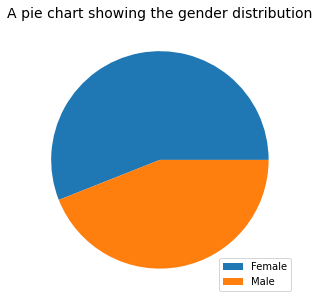

In [7]:
plt.figure(figsize = (8, 5))
plt.pie(value_count)
plt.legend(value_count.index, loc = 4)
plt.title("A pie chart showing the gender distribution", fontsize = 14)
plt.show()

### Age

Before we plot a histogram of `Age`, let's have a look at the descriptive statistics regarding this feature: 

In [8]:
dataset["Age"].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

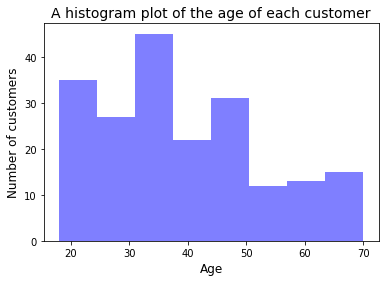

In [9]:
num_bins = 8
n, bins, patches = plt.hist(dataset["Age"], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Number of customers", fontsize = 12)
plt.title("A histogram plot of the age of each customer", fontsize = 14)
plt.show()

### Annual Income

Before we plot a histogram of `Annual Income`, let's have a look at the descriptive statistics regarding this feature: 

In [10]:
dataset["Annual Income (k$)"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

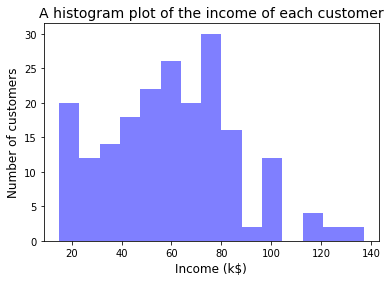

In [11]:
num_bins = 15
n, bins, patches = plt.hist(dataset["Annual Income (k$)"], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("Income (k$)", fontsize = 12)
plt.ylabel("Number of customers", fontsize = 12)
plt.title("A histogram plot of the income of each customer", fontsize = 14)
plt.show()

We could see our income distribution roughly follows a normal distribution. 

### Spending Score

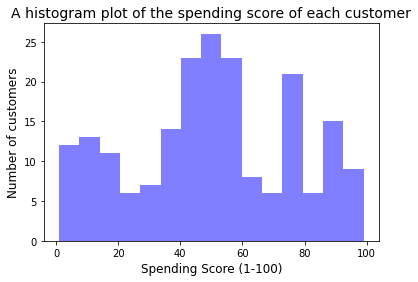

In [12]:
num_bins = 15
n, bins, patches = plt.hist(dataset["Spending Score (1-100)"], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("Spending Score (1-100)", fontsize = 12)
plt.ylabel("Number of customers", fontsize = 12)
plt.title("A histogram plot of the spending score of each customer", fontsize = 14)
plt.show()

We could see that we could segment customers into different clusters based on this plot.

### Income versus Spending Score

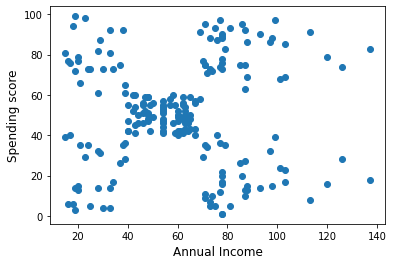

In [13]:
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending score", fontsize = 12)
plt.show()

It seems that we could there are $5$ distinct groups of customers based on their 

## Introduction to K means Clustering

Based on our income versus spending score scatter plot that we cluster our customers into 5 clusters. 


*Note* : We do not use *training* and *test* sets because K-means clustering is a unsupervised algorithm rather than a supervised algorithm.

In [14]:
new_dataset = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_pred = kmeans.fit_predict(new_dataset)

In [17]:
centroids = kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [18]:
new_dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


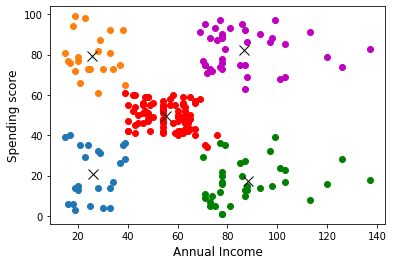

In [19]:
colors = ("r", "g", "tab:blue", "tab:orange", "m")
numbers = (0, 1, 2, 3, 4)
for (i, j) in zip(numbers, colors):
    plt.scatter(new_dataset[y_pred == i]["Annual Income (k$)"], new_dataset[y_pred == i]["Spending Score (1-100)"], c = j)


for (x, y) in centroids:
    plt.plot(x, y, marker = "x", markersize = 10, c = "k")
    
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending score", fontsize = 12)
plt.show()

In [20]:
kmeans.inertia_

44448.45544793369

It looks like our KMeans clustering solution gives us a nice solution with a 44448.46 inertia.

### Using the Elbow Method

In [21]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(new_dataset) for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

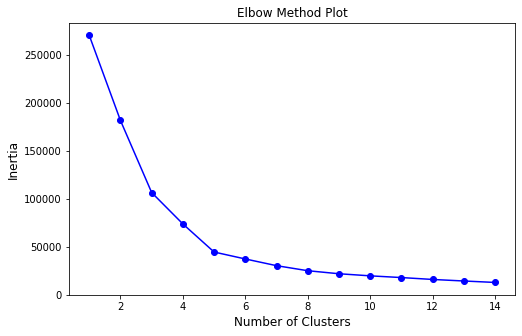

In [22]:
plt.figure(figsize = (8, 5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Inertia", fontsize = 12)
plt.title("Elbow Method Plot")

plt.show()

We could see there exists an elbow at k = 5 clusters.  Hence our assumption was correct.

### Silhouette Method

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(new_dataset, kmeans.labels_)

0.553931997444648

Our silhouette score is 0.55 for k = 5 clusters. 

Let's plot our silhouette scores against the number of clusters.

In [26]:
silhouette_scores = [silhouette_score(new_dataset, model.labels_) for model in kmeans_per_k[1:]]

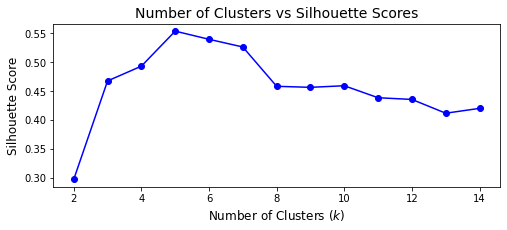

In [31]:
plt.figure(figsize = (8, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("Number of Clusters ($k$)", fontsize = 12)
plt.ylabel("Silhouette Score", fontsize = 12)
plt.title("Number of Clusters vs Silhouette Scores", fontsize = 14)
plt.show()

We can see that $k = 5$ clusters has indeed got the highest silhouette score so we pick $k= 5$ to be the most suitable number of clusters.

## Hierarchal Clustering

Let's use ward's method with euclidean distances:

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Finding the optimal number of clusters

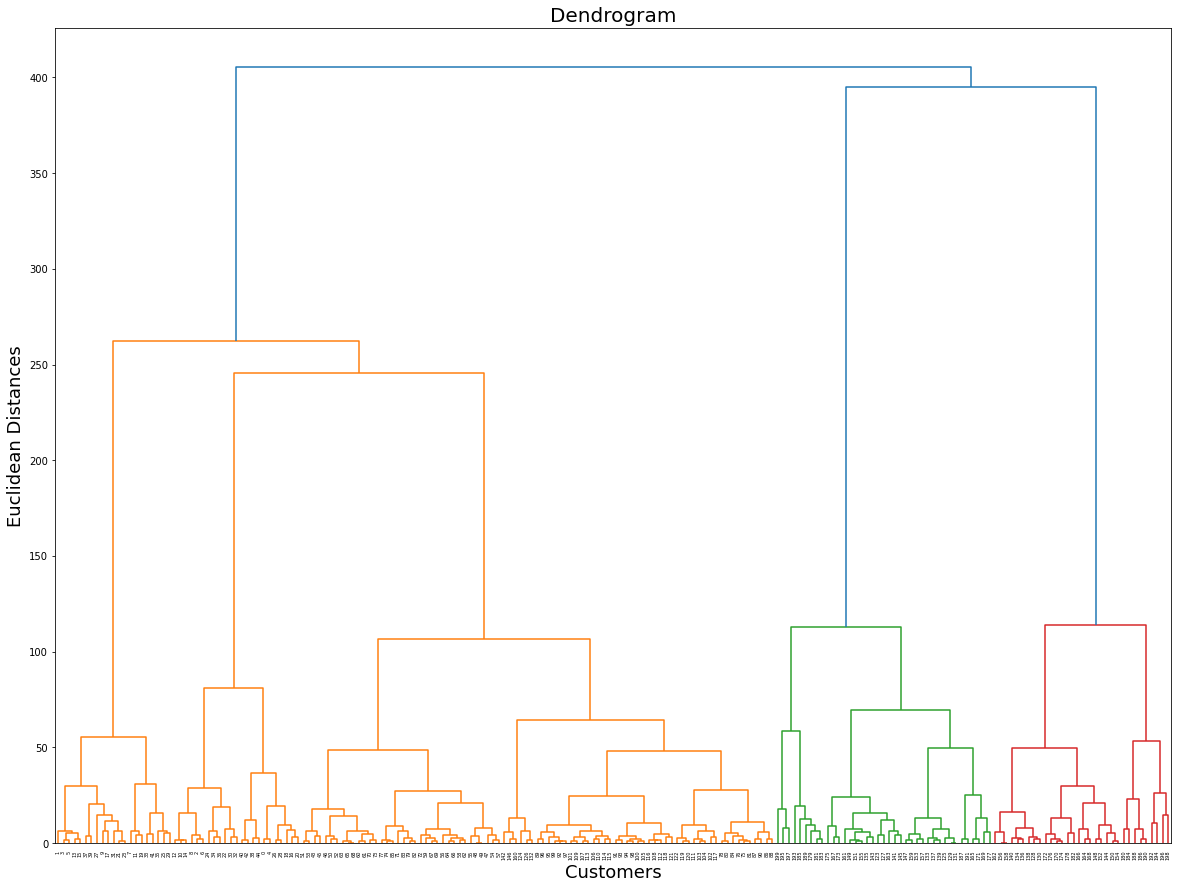

In [38]:
plt.figure(figsize = (20, 15))
dendrogram = sch.dendrogram(sch.linkage(new_dataset, method = "ward"))
plt.title("Dendrogram", fontsize = 20)
plt.xlabel("Customers", fontsize = 18)
plt.ylabel("Euclidean Distances", fontsize = 18)
plt.show()

The longest vertical line with no extended horizontal line is between $110-250$. Therefore let's take our threshold to be $150$. This means that our optimal number of clusters is $5$. 

### Training the data

In [40]:
agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_pred = agg_hc.fit_predict(new_dataset)

### Visualising the clusters

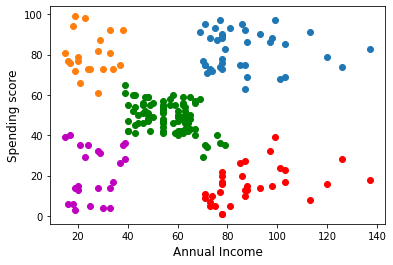

In [41]:
colors = ("r", "g", "tab:blue", "tab:orange", "m")
numbers = (0, 1, 2, 3, 4)
for (i, j) in zip(numbers, colors):
    plt.scatter(new_dataset[y_pred == i]["Annual Income (k$)"], new_dataset[y_pred == i]["Spending Score (1-100)"], c = j)
    
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending score", fontsize = 12)
plt.show()